<a href="https://colab.research.google.com/github/roggersanguzu/Machine-Learning/blob/main/Hyper_Regularization_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
cancer=load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target']=cancer.target

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
logreg=LogisticRegression(C=100,max_iter=100000).fit(X_train,y_train)

In [13]:
print("Training set Accuracy",logreg.score(X_train,y_train))
print("Testing Set Accuracy",logreg.score(X_test,y_test))

Training set Accuracy 0.9560439560439561
Testing Set Accuracy 0.956140350877193


**Regularization**

In [16]:
logreg02=LogisticRegression(C=0.001,max_iter=100000).fit(X_train,y_train)
print("Training set Accuracy",logreg02.score(X_train,y_train))
print("Testing Set Accuracy",logreg02.score(X_test,y_test))

Training set Accuracy 0.9384615384615385
Testing Set Accuracy 0.9649122807017544


In [17]:
logreg.coef_

array([[ 2.66779492e+00,  2.58455289e-01, -4.68165049e-01,
         6.47901471e-03, -4.05823445e+00,  1.90724738e+00,
        -6.25218236e+00, -8.64152849e+00, -1.36965052e+00,
         3.30271437e-01, -7.46736471e-01,  3.59810028e+00,
        -9.79908456e-01, -9.15664768e-02, -1.28237114e+00,
         6.44285597e+00,  7.10740285e+00, -7.38003359e-01,
         1.38194339e+00,  1.11708905e+00, -8.42367897e-01,
        -6.93486326e-01,  2.02678577e-01, -1.48133148e-02,
        -9.61073481e+00,  4.44628420e+00, -6.79974962e+00,
        -1.12852693e+01, -8.98062739e+00,  1.06064735e+00]])

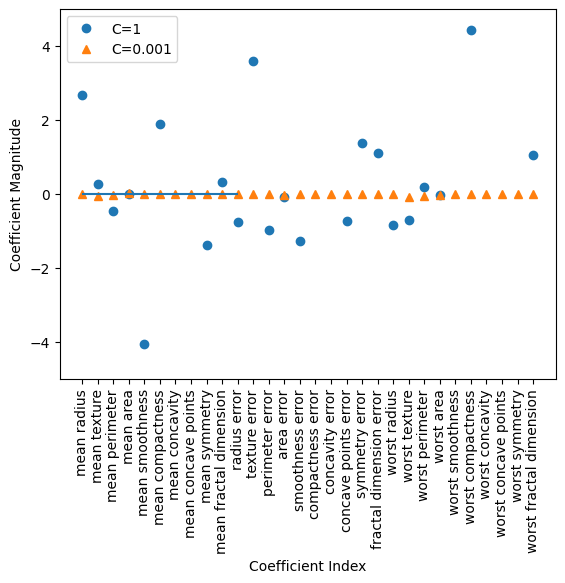

In [21]:
plt.plot(logreg.coef_.T,"o",label='C=1')
plt.plot(logreg02.coef_.T,"^",label='C=0.001')
plt.hlines(0,0,10)
plt.ylim(-5,5)
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.legend()